In [ ]:
Lauren Calso
Pyber Observable Trends Analysis
1) Drivers in rural cities have the highest fare on average.
2) The most revenue occurs in Urban cities from the Pyber Ridesharing Data in 2018.
3) The number of drivers in a city is similar to the number of rides in the city. 
However, the number of drivers is inversely proportionate to the average fare in the city.
This might be due to demand and supply in pricing. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy
import matplotlib.patches as mpatches

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
city_ride_data = ride_data_df.groupby("city")
ride_data = city_ride_data["fare"].mean()
ride_data = pd.DataFrame(ride_data)
ride_data["Total Number of Rides (Per City)"] = city_ride_data["ride_id"].nunique()
ride_data.reset_index(inplace=True)
ride_data.rename(columns={"fare":"Average Fare ($) Per City"},inplace=True)

In [5]:
final_data = pd.merge(ride_data_df, city_data_df, on="city")
final_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [6]:
final_data = pd.merge(ride_data, city_data_df, on="city")
final_data.head()

,city,Average Fare ($) Per City,Total Number of Rides (Per City),driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

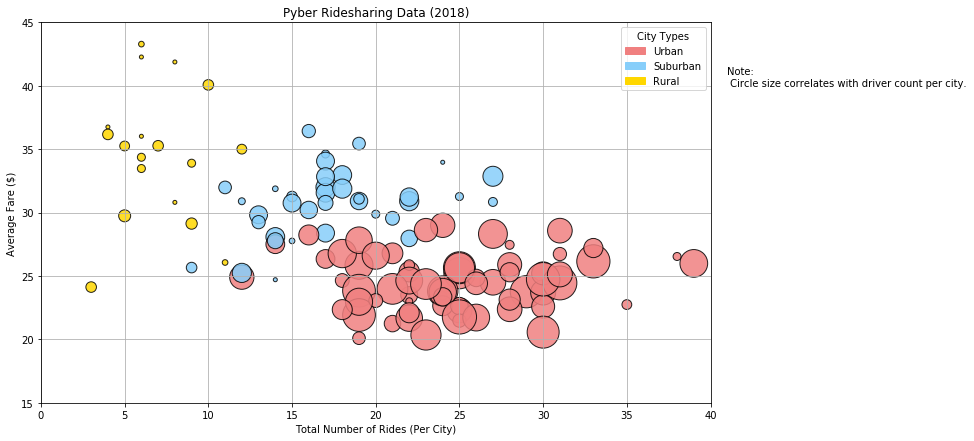

In [7]:
final_data["color"]= final_data["type"]

final_data.loc[:, 'color'].replace(["Urban", "Suburban", "Rural"], ["lightcoral", "lightskyblue", "Gold"],
                                    inplace=True)
colors= final_data["color"].values

fig = final_data.plot(kind="scatter", x="Total Number of Rides (Per City)", y="Average Fare ($) Per City", 
                      sizes=final_data['driver_count']*16 ,
                      grid=True, figsize=(12, 7), 
                      color=colors,
                      alpha=0.85,
                      edgecolors="black",
                      title="Pyber Ridesharing Data (2018)",
                      linewidths=1,legend=True
                      )

plt.xlim((0, 40))
plt.ylim(15, 45)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

one = mpatches.Patch(color='lightcoral', label='Urban')
two = mpatches.Patch(color='lightskyblue', label='Suburban')
three = mpatches.Patch(color='Gold', label='Rural')

plt.legend(title="City Types", handles=[one, two, three])

final_data.head()

txt="Note:\n Circle size correlates with driver count per city."
fig.text(41, 40, txt, ha='left')

plt.show()

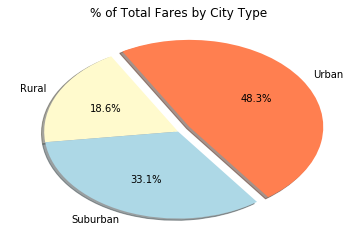

In [8]:
city_group_type = final_data.groupby(["type"], as_index='False')

city_group_type_summary = city_group_type ["driver_count", "Average Fare ($) Per City", "Total Number of Rides (Per City)"].sum().reset_index('type')

colors = ["lemonchiffon", "lightblue", "coral"]
explode = [0, 0, 0.1]

plt.pie(city_group_type_summary["Average Fare ($) Per City"], labels=city_group_type_summary["type"], colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

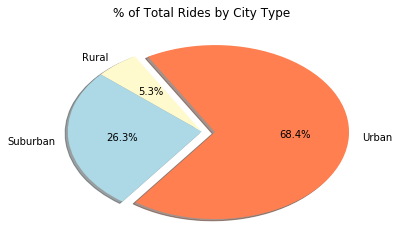

In [9]:
plt.pie(city_group_type_summary["Total Number of Rides (Per City)"], labels=city_group_type_summary["type"], colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

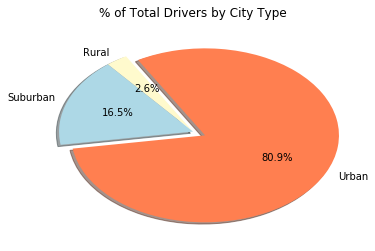

In [10]:
plt.pie(city_group_type_summary["driver_count"], labels=city_group_type_summary["type"], colors=colors,
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers by City Type")
plt.show()